# 주제선정: ABC 다국적 은행의 가입고객 이탈예측

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


1. customer_id (고객 ID):

- 역할: 각 고객을 고유하게 식별하는 ID입니다.
- 분석: 모델 학습에 직접 사용되지는 않지만, 고객별 분석이나 결과 확인 시 유용하게 사용됩니다. 중복된 ID는 없는지 확인해야 합니다.
- 이탈 예측 영향: 직접적인 영향은 없지만, 다른 정보와 결합하여 고객 세분화 등에 활용될 수 있습니다.

2. credit_score (신용 점수):

- 역할: 고객의 신용도를 나타내는 점수입니다.
- 분석: 신용 점수가 낮을수록 대출 상환 능력이 낮아 이탈할 가능성이 높을 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다. 일반적으로 신용 점수가 낮을수록 이탈률이 높아지는 경향이 있습니다.

3. country (국가):

- 역할: 고객의 거주 국가입니다.
- 분석: 국가별 경제 상황, 문화적 요인, 은행 서비스 이용 패턴 등이 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 국가별 이탈률 차이를 분석하여 특정 국가 고객에게 맞춤형 전략을 수립할 수 있습니다.

4. gender (성별):

- 역할: 고객의 성별입니다.
- 분석: 성별에 따른 금융 상품 선호도, 은행 이용 패턴 등이 다를 수 있습니다.
- 이탈 예측 영향: 성별별 이탈률 차이를 분석하여 특정 성별 고객에게 맞는 마케팅 전략을 수립할 수 있습니다.

5. age (나이):

- 역할: 고객의 나이입니다.
- 분석: 연령대별 금융 상품 이용 패턴, 라이프스타일 등이 다르기 때문에 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 특정 연령대에서 이탈률이 높다면 해당 연령대를 위한 맞춤형 서비스를 제공할 수 있습니다.

6. tenure (가입 기간):

- 역할: 고객이 은행에 가입한 기간 (년)입니다.
- 분석: 일반적으로 가입 기간이 짧은 고객이 이탈할 가능성이 높습니다. 장기 고객은 은행 서비스에 익숙하고 혜택을 누리고 있을 가능성이 높기 때문입니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

7. balance (잔액):

- 역할: 고객의 계좌 잔액입니다.
- 분석: 잔액이 적거나 없을 경우 은행 서비스 이용 필요성이 줄어들어 이탈 가능성이 높아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

8. products_number (상품 수):

- 역할: 고객이 이용하는 은행 상품의 개수입니다.
- 분석: 이용하는 상품 수가 많을수록 은행과의 관계가 깊어 이탈 가능성이 낮아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

9. credit_card (신용카드 보유 여부):

- 역할: 고객의 신용카드 보유 여부 (Yes/No 또는 1/0)입니다.
- 분석: 신용카드 보유 고객은 은행 서비스 이용률이 높고, 다양한 금융 상품을 이용할 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

10. active_member (활동 고객 여부):

- 역할: 고객의 활동 여부 (Yes/No 또는 1/0)입니다.
- 분석: 활동 고객은 은행 서비스를 꾸준히 이용하고 있으므로 이탈 가능성이 낮습니다.
- 이탈 예측 영향: 매우 중요한 예측 변수입니다.

11. estimated_salary (추정 연봉):

- 역할: 고객의 추정 연봉입니다.
- 분석: 연봉이 높을수록 은행의 VIP 고객일 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

12. churn (이탈 여부):

- 역할: 고객의 이탈 여부 (Yes/No 또는 1/0)입니다. Target 변수입니다.
- 분석: 모델 학습을 통해 이탈 가능성이 높은 고객을 예측하는 것이 목표입니다.
- 이탈 예측 영향: 모델의 성능을 평가하는 기준이 됩니다.

---

### 기본 전처리

In [195]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


---

1. customer_id (고객 ID):

- 역할: 각 고객을 고유하게 식별하는 ID입니다.
- 분석: 모델 학습에 직접 사용되지는 않지만, 고객별 분석이나 결과 확인 시 유용하게 사용됩니다. 중복된 ID는 없는지 확인해야 합니다.
- 이탈 예측 영향: 직접적인 영향은 없지만, 다른 정보와 결합하여 고객 세분화 등에 활용될 수 있습니다.

In [197]:
# 'customer_id' 열에서 중복된 값이 있는지 확인
duplicated_customer_id = df['customer_id'].duplicated()
duplicated_customer_id.sum()

np.int64(0)

---

### dtype: 문자형

In [198]:
yes_obj_df = df.select_dtypes(include=['object'])
yes_obj_df

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


3. country (국가):

- 역할: 고객의 거주 국가입니다.
- 분석: 국가별 경제 상황, 문화적 요인, 은행 서비스 이용 패턴 등이 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 국가별 이탈률 차이를 분석하여 특정 국가 고객에게 맞춤형 전략을 수립할 수 있습니다.

In [199]:
yes_obj_df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

4. gender (성별):

- 역할: 고객의 성별입니다.
- 분석: 성별에 따른 금융 상품 선호도, 은행 이용 패턴 등이 다를 수 있습니다.
- 이탈 예측 영향: 성별별 이탈률 차이를 분석하여 특정 성별 고객에게 맞는 마케팅 전략을 수립할 수 있습니다.

In [200]:
yes_obj_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

---

### dtype: 숫자형

In [201]:
no_obj_df = df.select_dtypes(exclude=['object'])
no_obj_df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


2. credit_score (신용 점수):

- 역할: 고객의 신용도를 나타내는 점수입니다.
- 분석: 신용 점수가 낮을수록 대출 상환 능력이 낮아 이탈할 가능성이 높을 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다. 일반적으로 신용 점수가 낮을수록 이탈률이 높아지는 경향이 있습니다.

In [202]:
# credit_score
# df['credit_score'].min(), df['credit_score'].max(), df['credit_score'].mean()
no_obj_df.iloc[:, 1].min(), no_obj_df.iloc[:, 1].max(), no_obj_df.iloc[:, 1].mean()

(np.int64(350), np.int64(850), np.float64(650.5288))

5. age (나이):

- 역할: 고객의 나이입니다.
- 분석: 연령대별 금융 상품 이용 패턴, 라이프스타일 등이 다르기 때문에 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 특정 연령대에서 이탈률이 높다면 해당 연령대를 위한 맞춤형 서비스를 제공할 수 있습니다.

In [203]:
# age
no_obj_df.iloc[:, 2].min(), no_obj_df.iloc[:, 2].max(), no_obj_df.iloc[:, 2].mean()

(np.int64(18), np.int64(92), np.float64(38.9218))

6. tenure (가입 기간):

- 역할: 고객이 은행에 가입한 기간 (년)입니다.
- 분석: 일반적으로 가입 기간이 짧은 고객이 이탈할 가능성이 높습니다. 장기 고객은 은행 서비스에 익숙하고 혜택을 누리고 있을 가능성이 높기 때문입니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

In [204]:
# tenure
no_obj_df.iloc[:, 3].min(), no_obj_df.iloc[:, 3].max(), no_obj_df.iloc[:, 3].mean()

(np.int64(0), np.int64(10), np.float64(5.0128))

7. balance (잔액):

- 역할: 고객의 계좌 잔액입니다.
- 분석: 잔액이 적거나 없을 경우 은행 서비스 이용 필요성이 줄어들어 이탈 가능성이 높아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

In [205]:
# balance
no_obj_df.iloc[:, 4].min(), no_obj_df.iloc[:, 4].max(), no_obj_df.iloc[:, 4].mean()

(np.float64(0.0), np.float64(250898.09), np.float64(76485.889288))

8. products_number (상품 수):

- 역할: 고객이 이용하는 은행 상품의 개수입니다.
- 분석: 이용하는 상품 수가 많을수록 은행과의 관계가 깊어 이탈 가능성이 낮아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

In [206]:
# products_number
no_obj_df.iloc[:, 5].min(), no_obj_df.iloc[:, 5].max(), no_obj_df.iloc[:, 5].mean()

(np.int64(1), np.int64(4), np.float64(1.5302))

9. credit_card (신용카드 보유 여부):

- 역할: 고객의 신용카드 보유 여부 (Yes/No 또는 1/0)입니다.
- 분석: 신용카드 보유 고객은 은행 서비스 이용률이 높고, 다양한 금융 상품을 이용할 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

In [207]:
# credit_card
no_obj_df.iloc[:, 6].min(), no_obj_df.iloc[:, 6].max(), no_obj_df.iloc[:, 6].mean()

(np.int64(0), np.int64(1), np.float64(0.7055))

10. active_member (활동 고객 여부):

- 역할: 고객의 활동 여부 (Yes/No 또는 1/0)입니다.
- 분석: 활동 고객은 은행 서비스를 꾸준히 이용하고 있으므로 이탈 가능성이 낮습니다.
- 이탈 예측 영향: 매우 중요한 예측 변수입니다.

In [208]:
# active_member
no_obj_df.iloc[:, 7].min(), no_obj_df.iloc[:, 7].max(), no_obj_df.iloc[:, 7].mean()

(np.int64(0), np.int64(1), np.float64(0.5151))

11. estimated_salary (추정 연봉):

- 역할: 고객의 추정 연봉입니다.
- 분석: 연봉이 높을수록 은행의 VIP 고객일 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

In [209]:
# estimated_salary
no_obj_df.iloc[:, 8].min(), no_obj_df.iloc[:, 8].max(), no_obj_df.iloc[:, 8].mean()

(np.float64(11.58), np.float64(199992.48), np.float64(100090.239881))

12. churn (이탈 여부):

- 역할: 고객의 이탈 여부 (Yes/No 또는 1/0)입니다. Target 변수입니다.
- 분석: 모델 학습을 통해 이탈 가능성이 높은 고객을 예측하는 것이 목표입니다.
- 이탈 예측 영향: 모델의 성능을 평가하는 기준이 됩니다.

In [210]:
# churn
no_obj_df.iloc[:, 9].min(), no_obj_df.iloc[:, 9].max(), no_obj_df.iloc[:, 9].mean()

(np.int64(0), np.int64(1), np.float64(0.2037))

---

### dtype: 숫자형 (시각화)

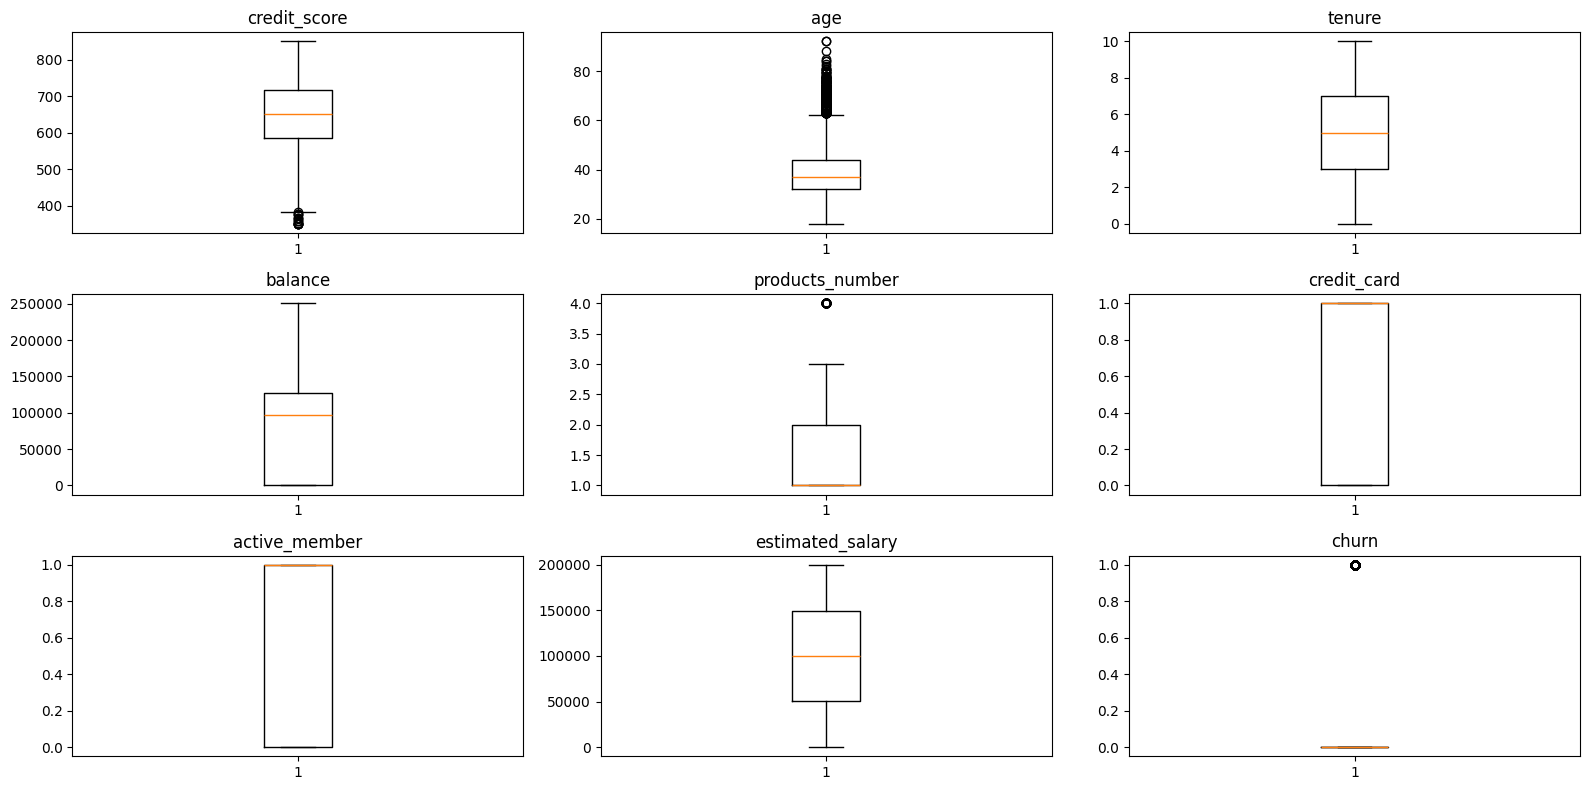

In [211]:
# customer_id 열 제외
only_count_df = no_obj_df.drop('customer_id', axis=1)

# subplot 생성 (3행 3열)
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

# 각 subplot에 boxplot 그리기
cols = only_count_df.columns
k = 0  # subplot index
for i in range(3):
    for j in range(3):
        if k < len(cols): # 모든 column을 plot했는지 확인
          ax = axes[i, j]
          ax.boxplot(only_count_df[cols[k]], zorder=5)
          ax.set_title(cols[k])
          k += 1 # 다음 column index로 이동

# subplot 간 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()

---

### 심화 전처리

In [212]:
    # churn     active
# 0   비이탈     비활동
# 1    이탈       활동

# 비이탈_비활동 -> 휴면고객
# 비이탈_활동 -> 활동고객
# 이탈_비활동 -> 완전이탈고객
# 이탈_활동 -> 최근이탈이거나, 복귀고객이거나

churn_active = df.groupby('churn')['active_member'].value_counts()
churn_active

churn  active_member
0      1                4416
       0                3547
1      0                1302
       1                 735
Name: count, dtype: int64

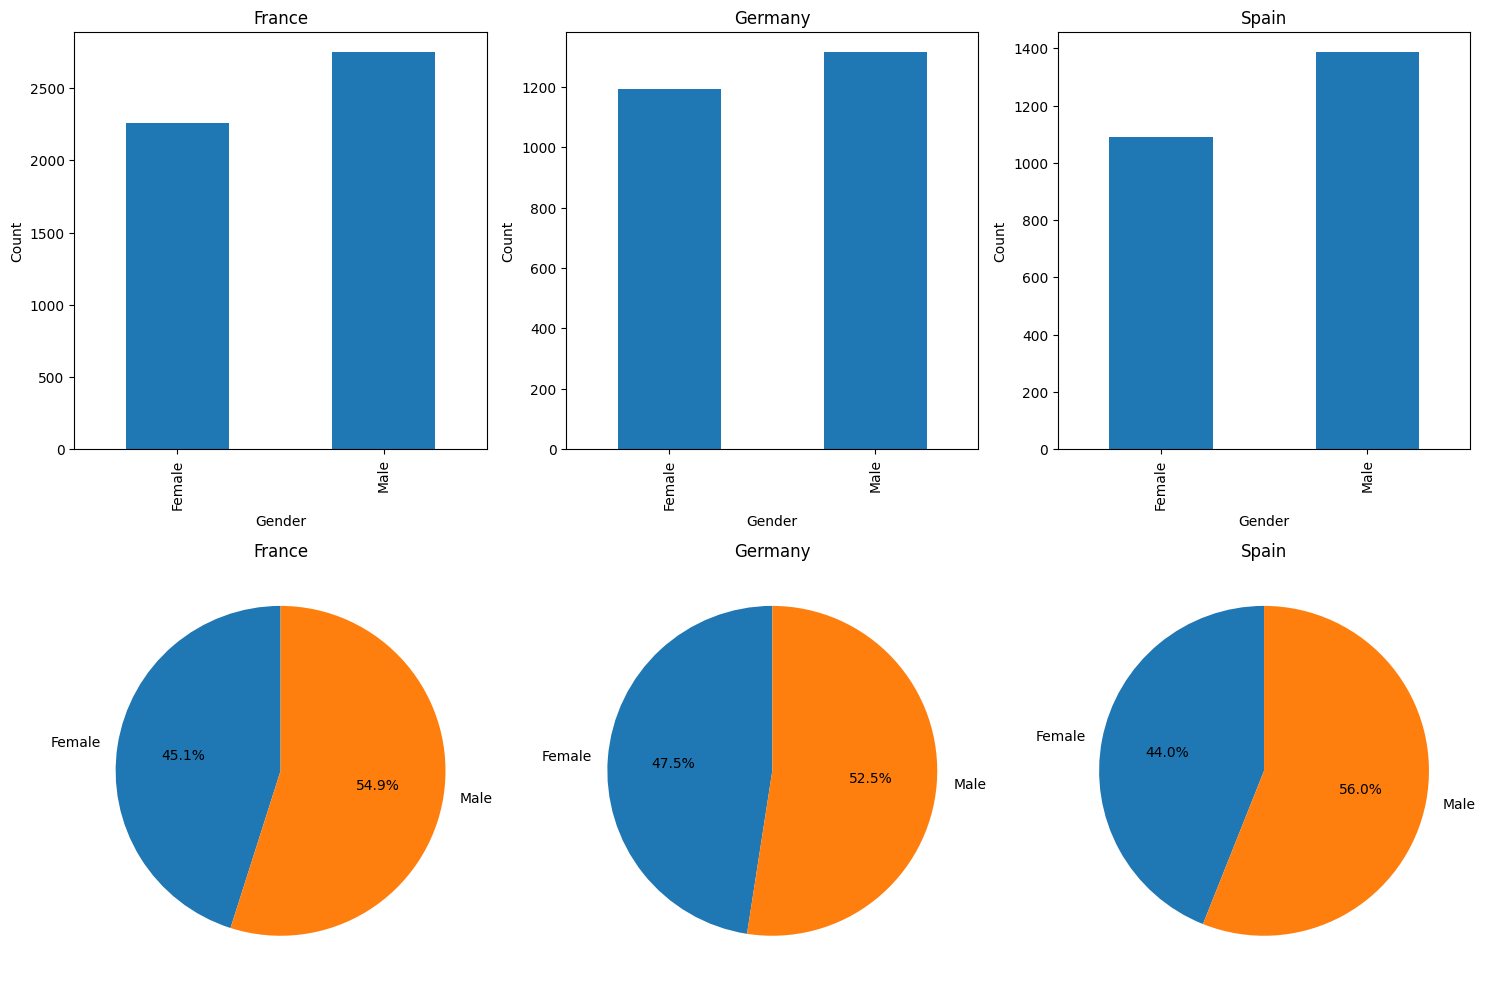

In [230]:
country_gender_df = df.groupby('country')['gender'].value_counts().unstack()

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figure size for better visualization

# Plot bar plots in the first row
for i, country in enumerate(country_gender_df.index):
    country_gender_df.loc[country].plot(kind='bar', ax=axes[0, i])  # Access subplots using 2D indexing
    axes[0, i].set_title(country)
    axes[0, i].set_xlabel('Gender')
    axes[0, i].set_ylabel('Count')
    axes[0, i].tick_params(axis='x', rotation=90)

# Plot pie plots in the second row
for i, country in enumerate(country_gender_df.index):
    # Calculate gender proportions for the pie chart
    gender_counts = country_gender_df.loc[country]
    proportions = gender_counts / gender_counts.sum()

    axes[1, i].pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)  # autopct for percentage display
    axes[1, i].set_title(country)
    axes[1, i].set_ylabel('')  # Remove unnecessary y-axis label

# Adjust layout and display plot
plt.tight_layout()
plt.show()